In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

In [28]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [29]:
path = "/content/gdrive/MyDrive/MachineLearning/praktikum/prak5/"

In [30]:
# membaca data file CSV
df = pd.read_csv(path + '/data/Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [32]:
#cek miisng value
df.isnull().sum()

,0
Id,0
SepalLengthCm,0
SepalWidthCm,0
PetalLengthCm,0
PetalWidthCm,0
Species,0


In [33]:
# cek duplicate
df.duplicated().sum()


np.int64(0)

/tmp/ipython-input-4013542642.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Species', data=df, palette='pastel')


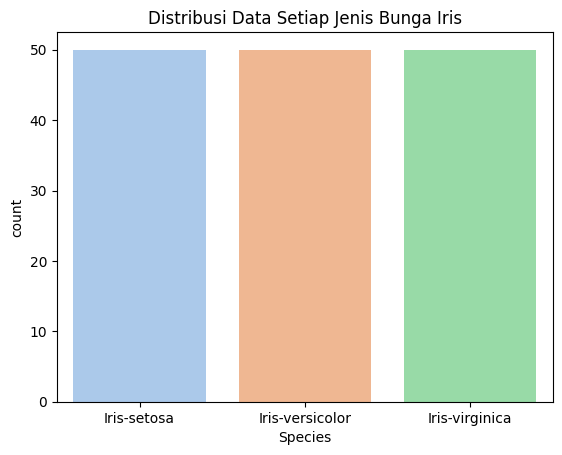


=== Statistik Deskriptif ===
               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%    112.750000       6.400000      3.300000       5.100000      1.800000
max    150.000000       7.900000      4.400000       6.900000      2.500000


In [34]:
# Melihat distribusi data target
sns.countplot(x='Species', data=df, palette='pastel')
plt.title("Distribusi Data Setiap Jenis Bunga Iris")
plt.show()

# Statistik deskriptif
print("\n=== Statistik Deskriptif ===")
print(df.describe())

In [35]:
# Encode kolom target Species menjadi numerik
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df['Species'] = encoder.fit_transform(df['Species'])

#Fitur dan Target
X = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
y = df['Species']

print("Ukuran X:", X.shape)
print("Ukuran y:", y.shape)

Ukuran X: (150, 4)
Ukuran y: (150,)


In [36]:
#PEMBAGIAN DATA TRAIN DAN TEST
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Data Latih:", X_train.shape)
print("Data Uji  :", X_test.shape)

Data Latih: (120, 4)
Data Uji  : (30, 4)


In [37]:
# Gunakan parameter
model = DecisionTreeClassifier(
    criterion='gini',
    max_depth=4,
    random_state=42
)

# Latih model
model.fit(X_train, y_train)
print("Model Decision Tree berhasil dilatih.")

Model Decision Tree berhasil dilatih.


In [38]:
# Prediksi data uji
y_pred = model.predict(X_test)

# Evaluasi
print("\n=== HASIL EVALUASI MODEL ===")
print("Akurasi :", round(accuracy_score(y_test, y_pred), 4))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


=== HASIL EVALUASI MODEL ===
Akurasi : 0.9333

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.90      0.90      0.90        10
           2       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



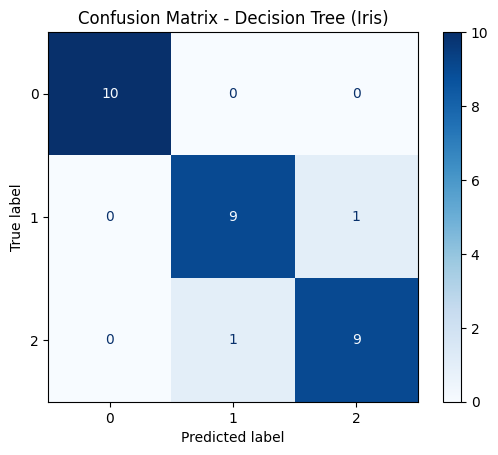

In [39]:
#CONFUSION MATRIX
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm, display_labels=model.classes_).plot(values_format='d', cmap='Blues')
plt.title("Confusion Matrix - Decision Tree (Iris)")
plt.show()

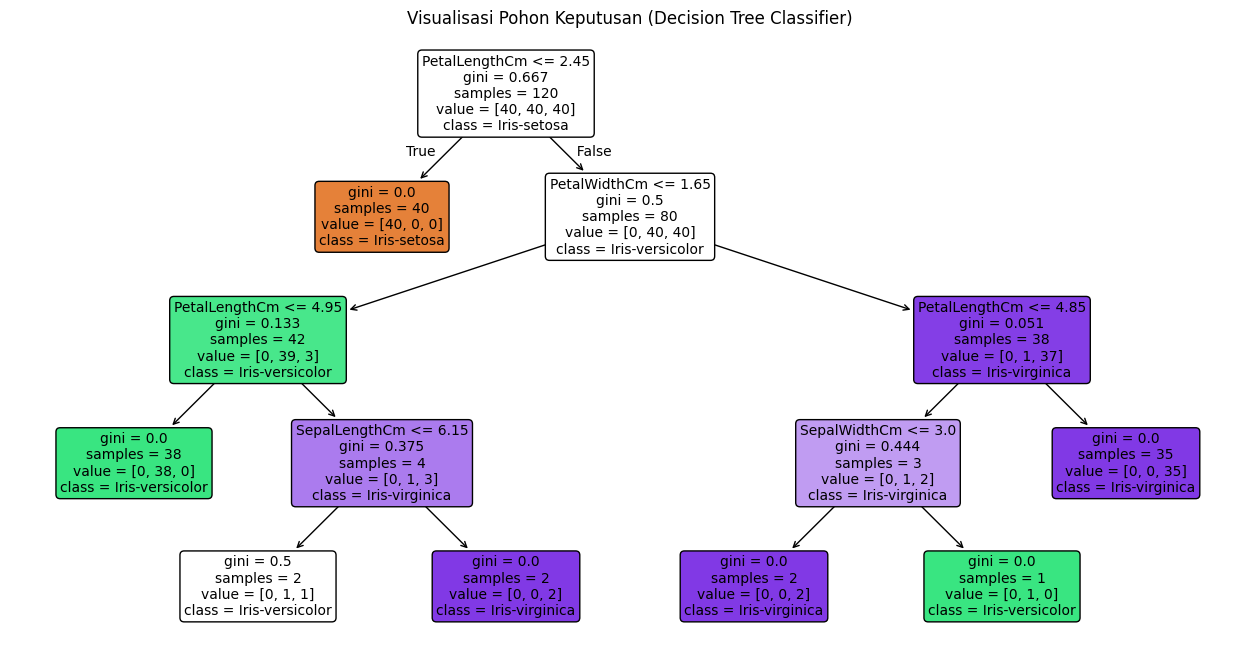

In [40]:
#VISUALISASI DECISION TREE
plt.figure(figsize=(16,8))
plot_tree(
    model,
    feature_names=X.columns,
    class_names=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], # Provide string class names
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Visualisasi Pohon Keputusan (Decision Tree Classifier)")
plt.show()

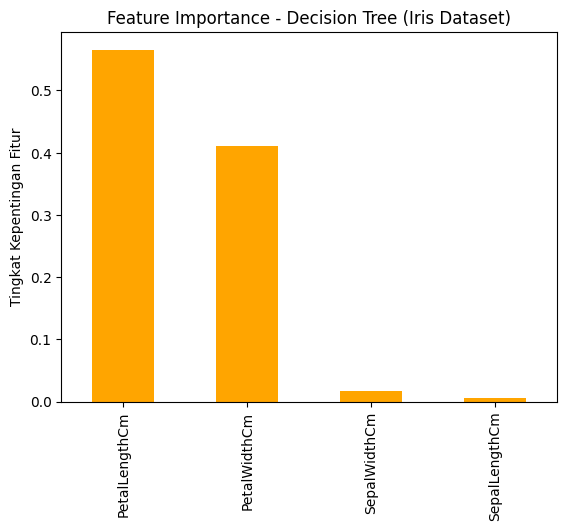

In [41]:
#FEATURE IMPORTANCE
importance = pd.Series(model.feature_importances_, index=X.columns)
importance.sort_values(ascending=False).plot(kind='bar', color='orange')
plt.title("Feature Importance - Decision Tree (Iris Dataset)")
plt.ylabel("Tingkat Kepentingan Fitur")
plt.show()

In [42]:
#PREDIKSI DATA BARU
data_baru = pd.DataFrame({
    'SepalLengthCm': [5.1, 6.0],
    'SepalWidthCm': [3.5, 2.9],
    'PetalLengthCm': [1.4, 4.5],
    'PetalWidthCm': [0.2, 1.5]
})

prediksi = model.predict(data_baru)

hasil = data_baru.copy()
hasil['Prediksi_Species'] = prediksi

print("=== HASIL PREDIKSI DATA BARU ===")
display(hasil)

=== HASIL PREDIKSI DATA BARU ===


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Prediksi_Species
0,5.1,3.5,1.4,0.2,0
1,6.0,2.9,4.5,1.5,1
